In [28]:
# Libraries

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [40]:
# Load data

df = pd.read_table('Data/purch.txt')
df.head(6)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,03/01/18,VR,82.20,GBP,82.20,GBP,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
1,05/02/18,VR,60.00,GBP,60.00,GBP,malthurst limited,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
2,29/01/18,VR,50.00,GBP,50.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
3,19/01/18,VR,45.00,GBP,45.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
4,18/01/18,VR,77.49,GBP,77.49,GBP,rontec moseley,************2823,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health
5,08/01/18,VR,63.87,GBP,63.87,GBP,rontec moseley,************2823,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health


In [41]:
# Explore data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TRANS DATE          5640 non-null   object
 1   TRANS VAT DESC      5011 non-null   object
 2   ORIGINAL GROSS AMT  5640 non-null   object
 3   ORIGINAL CUR        5640 non-null   object
 4   BILLING GROSS AMT   5640 non-null   object
 5   BILLING CUR CODE    5640 non-null   object
 6   MERCHANT NAME       5640 non-null   object
 7   CARD NUMBER         5640 non-null   object
 8   TRANS CAC CODE 1    5636 non-null   object
 9   TRANS CAC DESC 1    5636 non-null   object
 10  TRANS CAC CODE 2    5632 non-null   object
 11  TRANS CAC DESC 2    5632 non-null   object
 12  TRANS CAC CODE 3    5631 non-null   object
 13  Directorate         5640 non-null   object
dtypes: object(14)
memory usage: 617.0+ KB


In [42]:
# Columns' name

df.columns

Index(['TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR',
       'BILLING GROSS AMT', 'BILLING CUR CODE', 'MERCHANT NAME', 'CARD NUMBER',
       'TRANS CAC CODE 1', 'TRANS CAC DESC 1', 'TRANS CAC CODE 2',
       'TRANS CAC DESC 2', 'TRANS CAC CODE 3', 'Directorate'],
      dtype='object')

In [53]:
# Identify count by variables and it possible values

Dictionary = {}
for variable in df.columns:
    Dictionary[variable] = len(df[variable].unique())
    
Dictionary

{'TRANS DATE': 39,
 'TRANS VAT DESC': 6,
 'ORIGINAL GROSS AMT': 3720,
 'ORIGINAL CUR': 5,
 'BILLING GROSS AMT': 3722,
 'BILLING CUR CODE': 1,
 'MERCHANT NAME': 1244,
 'CARD NUMBER': 607,
 'TRANS CAC CODE 1': 80,
 'TRANS CAC DESC 1': 80,
 'TRANS CAC CODE 2': 476,
 'TRANS CAC DESC 2': 473,
 'TRANS CAC CODE 3': 4,
 'Directorate': 9}

In [46]:
# Transform type of data

# First, I replace . by ,
df['BILLING GROSS AMT'] = df['BILLING GROSS AMT'].str.replace(',', '')
df['ORIGINAL GROSS AMT'] = df['ORIGINAL GROSS AMT'].str.replace(',', '')

# Then, change type of data
df['BILLING GROSS AMT'] = df['BILLING GROSS AMT'].astype(float)#
df['ORIGINAL GROSS AMT'] = df['ORIGINAL GROSS AMT'].astype(float)

Es conveniente examinar cuáles son las categorías de agrupación útiles.

Las siguientes variables tienen menos de 10 posibles valores, por lo que será bueno explorarlas:

-TRANS VAT DESC, <br>
-ORIGINAL CUR, <br>
-TRANS CAC CODE 3, y <br>
-Directorate.

In [74]:
# Explorative data

t1 = df.groupby(by=['TRANS VAT DESC'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

t2 = df.groupby(by=['TRANS VAT DESC'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

pd.merge(t2, t1, on=['TRANS VAT DESC'])

,TRANS VAT DESC,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,VE,88.564000,101.000638,88.564000,101.000638
1,VL,57.773143,73.201567,57.773143,73.201567
2,VR,224.354253,865.025850,224.354253,865.025850
3,VS,75.641538,29.852021,75.641538,29.852021
4,VZ,96.928512,1184.881298,61.791554,168.098000


Hay dos cosas que notar de la tabla de encima: <br>
    1. Las desviaciones estandar son altas, esto quiere decir que los datos son muy dispersos como para valorar bien los promedios. <br>
    2. Los valores de las variables ORIGINAL GROSS AMT y BULLING GROSS AMT son distintos, a pesar de que parezca que no< esto se evidencia en los valores de las medias y desviaciones típicos hallados.

In [75]:
m1 = df.groupby(by=['ORIGINAL CUR'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['ORIGINAL CUR'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))


pd.merge(m2, m1, on=['ORIGINAL CUR'])

,ORIGINAL CUR,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,AUD,376.760000,NaN,222.590000,NaN
1,EUR,105.586667,122.519842,95.815556,111.073535
2,GBP,268.603985,783.980266,268.603985,783.980266
3,HUF,28197.666667,21841.207140,82.790000,63.985509
4,USD,180.697778,278.846732,135.191111,210.612078


In [77]:
m1 = df.groupby(by=['TRANS CAC CODE 3'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['TRANS CAC CODE 3'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

pd.merge(m2, m1, on=['TRANS CAC CODE 3'])

,TRANS CAC CODE 3,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,A00,284.016741,1096.407748,268.871285,784.374581
1,A46,86.347692,90.344530,86.347692,90.344530
2,A5F,122.633333,113.258373,122.633333,113.258373


Hay que notar en la tabla de arriba que datos son mucho más dispersos paracada código de la variable TRANS CAC CODE 3. <br>

In [78]:
m1 = df.groupby(by=['Directorate'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['Directorate'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

important = pd.merge(m2, m1, on=['Directorate'])

important

,Directorate,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,Adult Social Care and Health,331.403265,2234.109260,331.403265,2234.109260
1,CYP&F,66.550377,124.335740,66.549245,124.336277
2,CYP&F,327.881429,385.370614,327.881429,385.370614
3,CYP&F,117.640000,146.574737,117.640000,146.574737
4,CYP&F SCHOOLS,65.342753,101.564603,65.222719,101.237755
5,Corporate Resources,368.763743,2973.158102,147.598901,435.041100
6,DEVELOPMENT,78.570930,87.941759,78.470000,87.975465
7,Development,38.574286,59.793120,38.574286,59.793120
8,Local Services,677.325232,1060.514535,677.218689,1060.514194


Como se observa, hay un problema en la categoría CYP&F, pues se asignan 3 grupos diferentes para estas; probablemente se deba a espacios adincionales en su escritura. Esto se corregirá antes de analizar los datos.
Para verificar esto, vamos a servirnos de la siguiente línea de código escrita a continuación.

In [168]:
# All posibble values

important['Directorate'].unique()

array(['Adult Social Care and Health', 'CYP&F', 'CYP&FSCHOOLS',
       'Corporate Resources', 'DEVELOPMENT', 'Development',
       'Local Services'], dtype=object)

Es importante corregir este error en toda la base, así que:

In [82]:
df['Directorate'] = df['Directorate'].str.replace('CYP&F ', 'CYP&F')
df['Directorate'] = df['Directorate'].str.replace('CYP&F  ', 'CYP&F')

Reprocesando:

In [83]:
m1 = df.groupby(by=['Directorate'], as_index=False).agg(BILLING_GROSS_AMT_MEAN=('BILLING GROSS AMT', np.nanmean), 
                                                           BILLING_GROSS_AMT_STD=('BILLING GROSS AMT', np.nanstd))

m2 = df.groupby(by=['Directorate'], as_index=False).agg(ORIGINAL_GROSS_AMT_MEAN=('ORIGINAL GROSS AMT', np.nanmean), 
                                                           ORIGINAL_GROSS_AMT_STD=('ORIGINAL GROSS AMT', np.nanstd))

important = pd.merge(m2, m1, on=['Directorate'])

important

,Directorate,ORIGINAL_GROSS_AMT_MEAN,ORIGINAL_GROSS_AMT_STD,BILLING_GROSS_AMT_MEAN,BILLING_GROSS_AMT_STD
0,Adult Social Care and Health,331.403265,2234.109260,331.403265,2234.109260
1,CYP&F,72.903550,141.011665,72.902450,141.012175
2,CYP&FSCHOOLS,65.342753,101.564603,65.222719,101.237755
3,Corporate Resources,368.763743,2973.158102,147.598901,435.041100
4,DEVELOPMENT,78.570930,87.941759,78.470000,87.975465
5,Development,38.574286,59.793120,38.574286,59.793120
6,Local Services,677.325232,1060.514535,677.218689,1060.514194


# Clustering

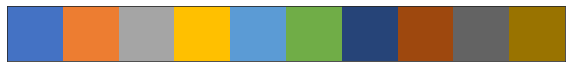

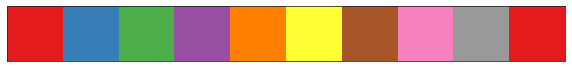

In [84]:
# Estilo de graficos

sns.set_style('white')
csfont = {'fontname':'Calibri'} # Fuente a utilizar

# Paleta de colores

my_palette = ['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Excel color palette
my_palette2 = sns.color_palette('Set1', 10)
sns.palplot(sns.color_palette(my_palette, 10))
sns.palplot(sns.color_palette('Set1', 10))

# Define palette

sns.set_palette(my_palette2)

In [114]:
# Primero hay que tomar un corte para hacer el análisis. Para eso vamos a tomar, temporalmente, la fecha más reciente.
# Sería mejor escribir un algoritmo para seleccionar al menos una transacción de una tarjeta en el rango de una fecha.
# Pero vamos a dejar esto de momento.

df['TRANS DATE'].sort_values(ascending=False)

5425    31/01/18
2325    31/01/18
4160    31/01/18
4159    31/01/18
2362    31/01/18
          ...   
4964    01/02/18
4963    01/02/18
4962    01/02/18
4961    01/02/18
4966    01/02/18
Name: TRANS DATE, Length: 5640, dtype: object

In [ ]:
df_kurt = df[df['TRANS DATE'] == '31/01/18']
df_kurt = df_kurt.loc[:, ~df_kurt.columns.isin(['TRANS DATE',
                                                'TRANS VAT DESC',
                                                'BILLING GROSS AMT', 
                                                'ORIGINAL CUR', 
                                                'BILLING CUR CODE',
                                                'MERCHANT NAME', 
                                                'CARD NUMBER', 
                                                'TRANS CAC CODE 1', 
                                                'TRANS CAC DESC 1',
                                                'TRANS CAC CODE 2', 
                                                'TRANS CAC DESC 2'])
                     ]
df_kurt.head(4)

#from sklearn import preprocessing

df_kurt_norm = df_kurt.copy()
scaler = preprocessing.MinMaxScaler()
df_kurt[['ORIGINAL GROSS AMT']] = scaler.fit_transform(df_kurt[['ORIGINAL GROSS AMT']])

# Primer intento

In [169]:
# Identify count by variables and it possible values

Dictionary = {}
for variable in df.columns:
    Dictionary[variable] = len(df[variable].unique())
    
Dictionary

{'TRANS DATE': 39,
 'TRANS VAT DESC': 6,
 'ORIGINAL GROSS AMT': 3720,
 'ORIGINAL CUR': 5,
 'BILLING GROSS AMT': 3722,
 'BILLING CUR CODE': 1,
 'MERCHANT NAME': 1244,
 'CARD NUMBER': 607,
 'TRANS CAC CODE 1': 80,
 'TRANS CAC DESC 1': 80,
 'TRANS CAC CODE 2': 476,
 'TRANS CAC DESC 2': 473,
 'TRANS CAC CODE 3': 4,
 'Directorate': 7}

In [201]:
df_kurt = df[df['TRANS DATE'] == '31/01/18']
df_kurt = df_kurt[['TRANS VAT DESC', 'ORIGINAL CUR', 'TRANS CAC CODE 3',  
                   'Directorate', 'ORIGINAL GROSS AMT', 'BILLING GROSS AMT']
                 ]
df_kurt = df_kurt.dropna()
df_kurt

,TRANS VAT DESC,ORIGINAL CUR,TRANS CAC CODE 3,Directorate,ORIGINAL GROSS AMT,BILLING GROSS AMT
6,VR,GBP,A00,Adult Social Care and Health,51.43,51.43
16,VR,GBP,A00,Adult Social Care and Health,75.00,75.00
51,VR,GBP,A00,Adult Social Care and Health,55.54,55.54
64,VR,GBP,A00,Adult Social Care and Health,39.09,39.09
89,VR,GBP,A00,Adult Social Care and Health,39.28,39.28
...,...,...,...,...,...,...
5425,VR,GBP,A00,Local Services,60.00,60.00
5539,VR,GBP,A00,Local Services,8.25,8.25
5540,VR,GBP,A00,Local Services,426.35,426.35
5599,VR,GBP,A00,Local Services,18.00,18.00


In [202]:
from sklearn import preprocessing

df_kurt_norm = df_kurt.copy()
scaler = preprocessing.MinMaxScaler()
df_kurt[['ORIGINAL GROSS AMT', 'BILLING GROSS AMT']] = scaler.fit_transform(df_kurt[['ORIGINAL GROSS AMT', 'BILLING GROSS AMT']])

In [197]:
df_kurt

,TRANS VAT DESC,ORIGINAL CUR,TRANS CAC CODE 3,Directorate,ORIGINAL GROSS AMT,BILLING GROSS AMT
6,VR,GBP,A00,Adult Social Care and Health,0.471197,0.471197
16,VR,GBP,A00,Adult Social Care and Health,0.475865,0.475865
51,VR,GBP,A00,Adult Social Care and Health,0.472011,0.472011
64,VR,GBP,A00,Adult Social Care and Health,0.468753,0.468753
89,VR,GBP,A00,Adult Social Care and Health,0.468791,0.468791
...,...,...,...,...,...,...
5425,VR,GBP,A00,Local Services,0.472894,0.472894
5539,VR,GBP,A00,Local Services,0.462646,0.462646
5540,VR,GBP,A00,Local Services,0.545444,0.545444
5599,VR,GBP,A00,Local Services,0.464577,0.464577


In [228]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, init='Cao')

clusters = kproto.fit_predict(df_kurt_norm, categorical=[0, 1, 2, 3])

# join data with labels

labels = pd.DataFrame(clusters)
labeledkurts = pd.concat((df_kurt, labels), axis=1)
labeledkurts = labeledkurts.rename({0:'labels'}, axis=1)

In [230]:
labeledkurts['Constant'] = 0

labeledkurts

,TRANS VAT DESC,ORIGINAL CUR,TRANS CAC CODE 3,Directorate,ORIGINAL GROSS AMT,BILLING GROSS AMT,labels,Constant
6,VR,GBP,A00,Adult Social Care and Health,0.471197,0.471197,0.0,0
16,VR,GBP,A00,Adult Social Care and Health,0.475865,0.475865,0.0,0
51,VR,GBP,A00,Adult Social Care and Health,0.472011,0.472011,0.0,0
64,VR,GBP,A00,Adult Social Care and Health,0.468753,0.468753,0.0,0
89,VR,GBP,A00,Adult Social Care and Health,0.468791,0.468791,0.0,0
...,...,...,...,...,...,...,...,...
220,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
221,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
222,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0
223,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [232]:
labeledkurts = labeledkurts.dropna()

C:\Users\micha\AppData\Local\Temp\ipykernel_7856\1894082239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeledkurts['Constant'] = 0 #dummy feature for plotting
c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:3775: UserWarning: ca

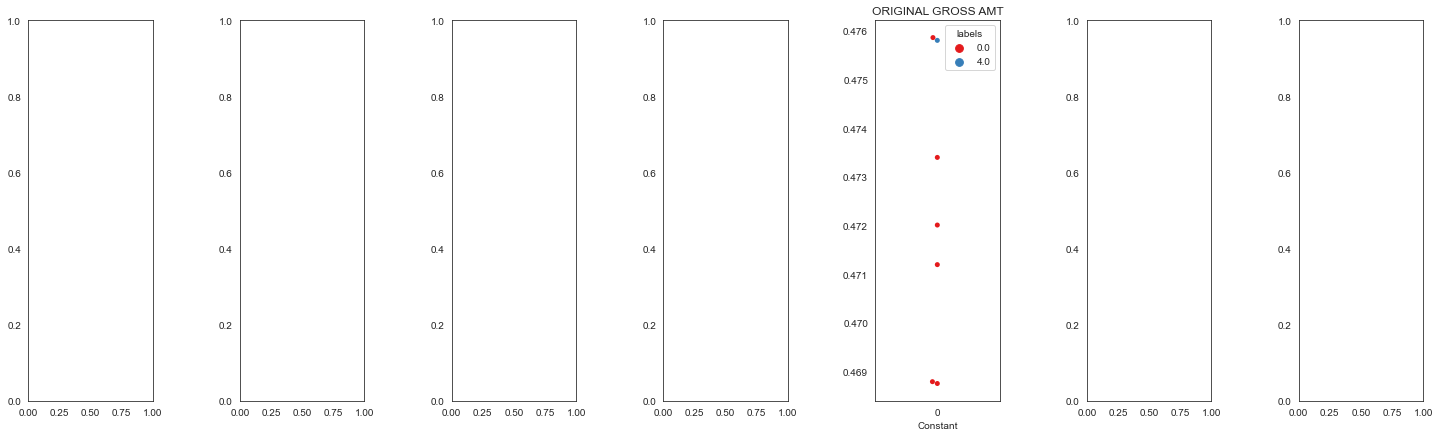

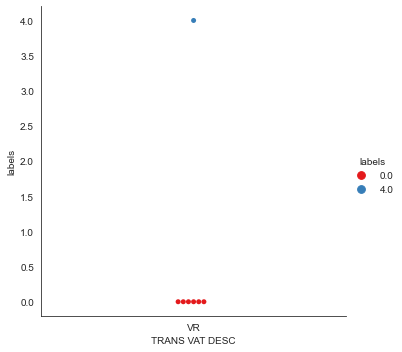

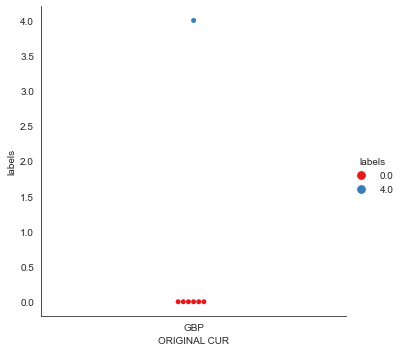

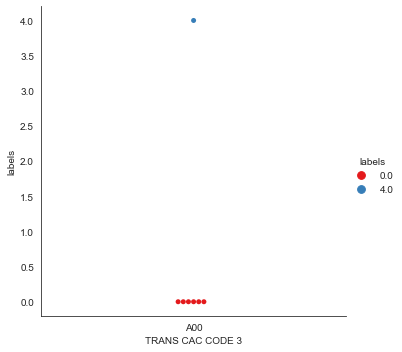

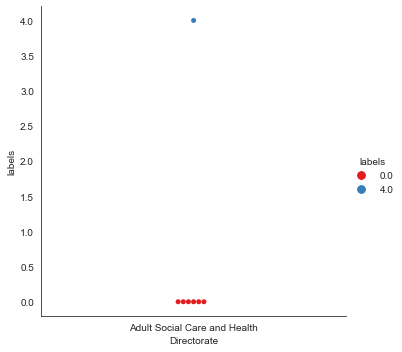

In [233]:
# Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

labeledkurts['Constant'] = 0 #dummy feature for plotting

f, axes = plt.subplots(1, 7, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i in range(5):
    col = labeledkurts.columns[i]
    if i < 4:    
        sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=labeledkurts, ax=axes[i])
    else:
        ax = sns.swarmplot(x=labeledkurts['Constant'], y=labeledkurts[col].values, hue=labeledkurts['labels'], ax=axes[i])
        ax.set_title(col)

        
plt.show()

In [194]:
labeledkurts

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,labels,Constant
0,03/01/18,VR,82.20,GBP,82.20,GBP,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,3.0,0
1,05/02/18,VR,60.00,GBP,60.00,GBP,malthurst limited,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,3.0,0
2,29/01/18,VR,50.00,GBP,50.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,3.0,0
3,19/01/18,VR,45.00,GBP,45.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,3.0,0
4,18/01/18,VR,77.49,GBP,77.49,GBP,rontec moseley,************2823,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,10/01/18,VR,63.83,GBP,63.83,GBP,bp clock f/s,************4599,K020,Vehicle Fuel,RHNCA,Careline,A00,Local Services,NaN,0
5636,02/02/18,VR,34.64,GBP,34.64,GBP,sparkbrook service,************4599,K020,Vehicle Fuel,RHNCA,Careline,A00,Local Services,NaN,0
5637,24/01/18,VR,48.01,GBP,48.01,GBP,malthurst limited,************2150,K020,Vehicle Fuel,RTG15,Enforcement Team,A00,Local Services,NaN,0
5638,13/01/18,VR,20.55,GBP,20.55,GBP,wilko retail limit,************8673,L100,Equip Operational,RJHH8,Homeless Centre-Breedon Road,A00,Local Services,NaN,0


Bibliografía <br>
https://github.com/ryankemmer/ClusteringMixedData/blob/main/clusteringMixedData.ipynb

In [116]:
from sklearn import preprocessing

df_kurt_norm = df_kurt.copy()
scaler = preprocessing.MinMaxScaler()
df_kurt[['ORIGINAL GROSS AMT']] = scaler.fit_transform(df_kurt[['ORIGINAL GROSS AMT']])

In [117]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=8, init='Cao')

clusters = kproto.fit_predict(df_kurt_norm, categorical=[0, 1])

# join data with labels

labels = pd.DataFrame(clusters)
labeledkurts = pd.concat((df, labels), axis=1)
labeledkurts = labeledkurts.rename({0:'labels'}, axis=1)

ValueError: could not convert string to float: 'shell kings 587'

In [119]:
df_kurt['MERCHANT NAME'].unique()

array(['shell kings 587', 'hmcourts-service.g', 'weoley castle',
       'texaco ash motor', 'acocks green 224', 'travel up',
       'www.traveltrolley.co.uk', 'esso aston way ss',
       'tesco stores 2503', 'solace group', 'yorks cafe',
       'shell crosskey 586', 'www.britishgas.co.', 'virgin medis pymts',
       'npower', 'scottish power', 'facebk fspsme2wq2',
       'facebk aspsme2wq2', 'currys s/s', 'shell penhale',
       'toolstation ltd', 'e service', 'bcc register offic',
       'janitorial direct ltd', 'amazon uk retail',
       'amazon uk marketplace', 'www.nisbets.com', 'b  q 1357',
       'dunelm (soft furnishin', 'argos ltd', 'aldi 75 772',
       'saleh  sons', 'farmfoods- newtown', 'tesco stores 5197',
       'the castle hardwar', 'www.tes.com', 'tesco direct',
       'perry barr service', 'facebk z39uue6py2', 'decathlon uk vad',
       'amazon svcs eu-uk amazon.', 'www.wmca.co.uk', 'paypal eaclare',
       'amazon eu amazon.co.uk', 'argos retail group',
       'js onl

In [154]:
df_kurt = df[df['TRANS DATE'] == '31/01/18']
df_kurt = df_kurt.loc[:, ~df_kurt.columns.isin(['TRANS DATE',
                                                'TRANS VAT DESC',
                                                'BILLING GROSS AMT', 
                                                'ORIGINAL CUR', 
                                                'BILLING CUR CODE',
                                                'MERCHANT NAME', 
                                                'CARD NUMBER', 
                                                'TRANS CAC CODE 1', 
                                                'TRANS CAC DESC 1',
                                                'TRANS CAC CODE 2', 
                                                'TRANS CAC DESC 2'])
                     ]
df_kurt.head(4)

#from sklearn import preprocessing

df_kurt_norm = df_kurt.copy()
scaler = preprocessing.MinMaxScaler()
df_kurt[['ORIGINAL GROSS AMT']] = scaler.fit_transform(df_kurt[['ORIGINAL GROSS AMT']])

In [155]:
df_kurt.columns

Index(['ORIGINAL GROSS AMT', 'TRANS CAC CODE 3', 'Directorate'], dtype='object')

In [160]:
df_kurt.columns

Index(['ORIGINAL GROSS AMT', 'TRANS CAC CODE 3', 'Directorate'], dtype='object')

In [166]:

from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=4, init='Cao')

clusters = kproto.fit_predict(df_kurt_norm, categorical=[1, 2])

# join data with labels

labels = pd.DataFrame(clusters)
labeledkurts = pd.concat((df, labels), axis=1)
labeledkurts = labeledkurts.rename({0:'labels'}, axis=1)

c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\micha\documents\clustering\clustering\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\micha\document

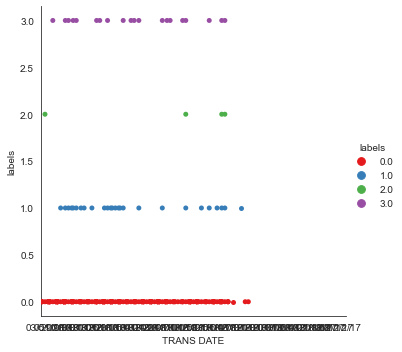

In [167]:
# Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

labeledkurts['Constant'] = 0 #dummy feature for plotting

f, axes = plt.subplots(1, 2, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i in range(2):
    col = labeledkurts.columns[i]
    if i < 1:    
        sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=labeledkurts, ax=axes[i])
    else:
        ax = sns.swarmplot(x=labeledkurts['Constant'], y=labeledkurts[col].values, hue=labeledkurts['labels'],ax=axes[i])
        ax.set_title(col)
        
plt.close(0)
plt.close(1)
plt.show()